In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.cluster import KMeans

In [5]:
stocks = pd.read_csv('../data/stocks.csv').set_index('Symbol')
stocks.head(n=10)

,Name,Sector
Symbol,,
AAPL,Apple Inc.,Information Technology
ABBV,AbbVie,Health Care
ABT,Abbott Laboratories,Health Care
ACN,Accenture,Information Technology
ADBE,Adobe Inc.,Information Technology
AIG,American International Group,Financials
AMD,Advanced Micro Devices,Information Technology
AMGN,Amgen,Health Care
AMT,American Tower,Real Estate


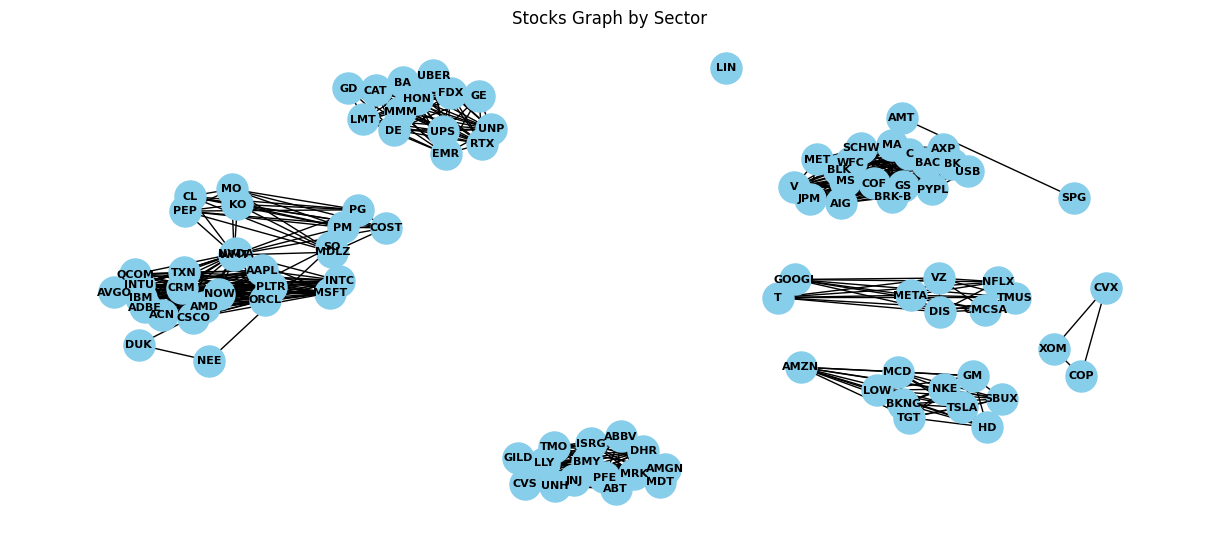

In [7]:
adj_stocks = np.array([
	[stocks.loc[stock1, 'Sector'] == stocks.loc[stock2, 'Sector'] * (stock1 != stock2) for stock1 in stocks.index] for stock2 in stocks.index
]).astype(int)
stocks_graph = nx.from_numpy_array(adj_stocks)
stocks_graph = nx.relabel_nodes(stocks_graph, dict(enumerate(stocks.index)))

plt.figure(figsize=(12, 5))
nx.draw(stocks_graph, with_labels=True, node_size=500, node_color='skyblue', font_size=8, font_weight='bold', font_color='black', pos=nx.spring_layout(stocks_graph, k=.5))
plt.title('Stocks Graph by Sector')
plt.show()

In [8]:
fundamentals = pd.read_csv('../data/fundamentals.csv').set_index("Symbol")
fundamentals.head(n=10)

,marketCap,trailingPE,forwardPE,priceToBook,trailingEps,forwardEps,bookValue,payoutRatio,beta,fiveYearAvgDividendYield,52WeekChange,averageVolume,enterpriseToRevenue,profitMargins
Symbol,,,,,,,,,,,,,,
AAPL,4.232020,-0.118279,0.001860,0.319914,-0.175282,-0.203437,-0.100801,-0.469082,0.233075,-0.999637,0.092624,1.600044,0.212578,0.724756
ABBV,-0.079928,0.734254,-0.244290,-9.861540,-0.544849,-0.026418,-0.100911,5.132847,-1.079175,1.033417,-0.183186,-0.357023,0.055436,-1.254594
ABT,-0.283253,-0.256560,-0.143159,0.083437,-0.145138,-0.349407,-0.100278,-0.287085,-0.656662,-0.261482,-0.261363,-0.338862,-0.123097,1.153697
ACN,-0.354758,-0.222817,-0.247669,0.087068,0.107470,0.063481,-0.099828,-0.057002,0.644411,-0.424127,-0.946729,-0.373280,-0.325301,-0.648374
ADBE,-0.369860,-0.218509,-0.268214,0.120954,0.341388,0.363763,-0.100305,-0.629799,1.118341,-1.256115,-0.989643,-0.395859,-0.041388,0.992315
AIG,-0.487766,-0.261709,-0.349236,0.068508,-0.302490,-0.277580,-0.099312,-0.267216,-0.679017,0.082573,-0.295871,-0.398836,-0.374782,-0.591700
AMD,-0.043541,0.669824,0.300822,0.096427,-0.524954,-0.352188,-0.100116,-0.629799,2.021492,-1.331182,1.368813,1.868109,0.514672,-0.773385
AMGN,-0.348109,-0.197466,-0.304092,0.165848,0.112896,0.369324,-0.100612,0.260434,-1.139534,0.589273,-0.492412,-0.478915,-0.055292,0.037154
AMT,-0.439933,-0.169362,-0.102551,0.163844,-0.247628,-0.273873,-0.100727,0.630306,-0.276623,0.364073,-0.699781,-0.455469,0.429826,0.827650


build an autoencoder to reduce the dimensionality of the fundamental data, and then cluster and link the stocks following these clusters

In [10]:
def get_clusters(data: np.ndarray, n_clusters: int) -> np.ndarray:
    kmeans = KMeans(n_clusters=n_clusters)
    return kmeans.fit(data).labels_

In [11]:
fundamentals_corr = fundamentals.transpose().corr(method="spearman")
fundamentals_corr = (fundamentals_corr - (fundamentals_corr == 1))  # Remove self-correlation
fundamentals_corr.head(n=10)

Symbol,AAPL,ABBV,ABT,ACN,ADBE,AIG,AMD,AMGN,AMT,AMZN,...,UBER,UNH,UNP,UPS,USB,V,VZ,WFC,WMT,XOM
Symbol,,,,,,,,,,,,,,,,,,,,,
AAPL,0.000000,-0.613187,0.156044,-0.248352,0.217582,-0.657143,0.481319,-0.621978,-0.283516,0.657143,...,0.613187,-0.230769,-0.085714,-0.551648,-0.081319,0.485714,-0.142857,0.538462,0.375824,-0.248352
ABBV,-0.613187,0.000000,-0.314286,-0.178022,-0.564835,0.415385,-0.248352,0.331868,0.182418,-0.389011,...,-0.767033,0.015385,-0.358242,0.217582,-0.151648,-0.384615,0.323077,-0.586813,0.006593,0.318681
ABT,0.156044,-0.314286,0.000000,-0.178022,0.182418,0.200000,-0.261538,0.191209,0.564835,-0.252747,...,0.287912,-0.160440,0.261538,-0.353846,0.178022,0.529670,0.120879,0.217582,0.037363,-0.068132
ACN,-0.248352,-0.178022,-0.178022,0.000000,0.569231,0.112088,0.054945,0.173626,0.006593,0.037363,...,-0.076923,0.556044,0.428571,0.578022,0.072527,-0.090110,-0.112088,-0.331868,-0.217582,0.068132
ADBE,0.217582,-0.564835,0.182418,0.569231,0.000000,-0.384615,0.037363,0.024176,0.125275,-0.076923,...,0.397802,0.085714,0.692308,-0.054945,0.160440,0.512088,-0.454945,0.125275,-0.512088,-0.503297
AIG,-0.657143,0.415385,0.200000,0.112088,-0.384615,0.000000,-0.362637,0.604396,0.279121,-0.406593,...,-0.503297,0.384615,-0.046154,0.534066,0.156044,-0.349451,0.569231,-0.257143,0.147253,0.626374
AMD,0.481319,-0.248352,-0.261538,0.054945,0.037363,-0.362637,0.000000,-0.828571,-0.626374,0.767033,...,0.564835,-0.173626,-0.397802,-0.230769,-0.287912,-0.085714,-0.301099,0.178022,0.406593,-0.441758
AMGN,-0.621978,0.331868,0.191209,0.173626,0.024176,0.604396,-0.828571,0.000000,0.652747,-0.841758,...,-0.657143,0.393407,0.463736,0.454945,0.327473,0.024176,0.459341,-0.345055,-0.393407,0.534066
AMT,-0.283516,0.182418,0.564835,0.006593,0.125275,0.279121,-0.626374,0.652747,0.000000,-0.771429,...,-0.173626,-0.169231,0.573626,0.200000,0.621978,0.116484,0.358242,-0.050549,-0.468132,0.151648


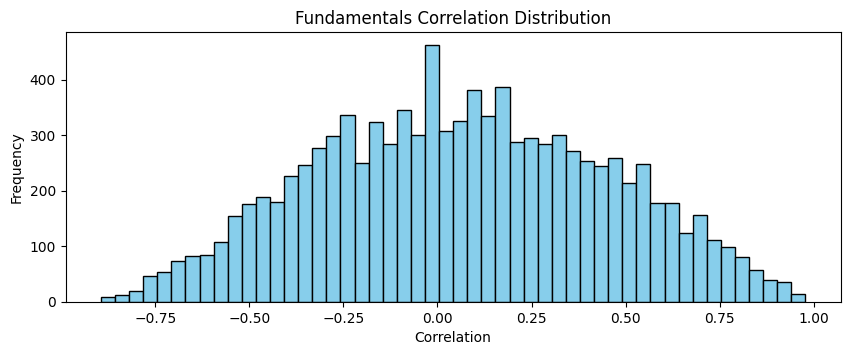

In [12]:
plt.figure(figsize=(10, 3.5))
plt.hist(fundamentals_corr.values.flatten(), bins=50, color='skyblue', edgecolor='black')
plt.title('Fundamentals Correlation Distribution')
plt.xlabel('Correlation')
plt.ylabel('Frequency')
plt.show()

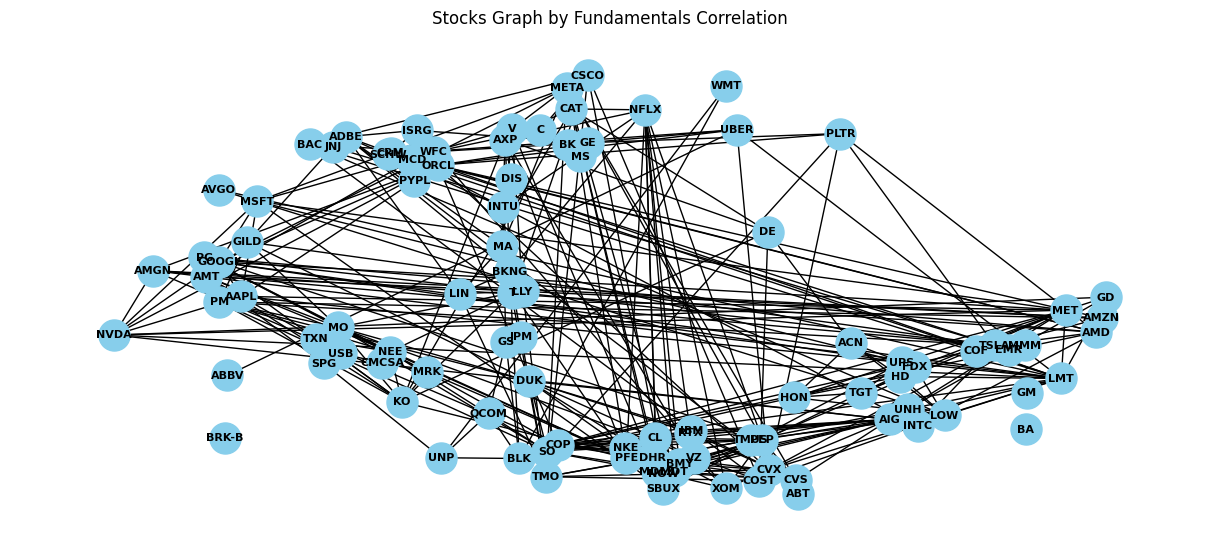

In [13]:
fundamentals_corr_np = fundamentals_corr.to_numpy()
adj_fundamentals_corr = (fundamentals_corr_np * (abs(fundamentals_corr_np) > .7).astype(int))

fundamentals_corr_graph = nx.from_numpy_array(adj_fundamentals_corr)
fundamentals_corr_graph = nx.relabel_nodes(fundamentals_corr_graph, dict(enumerate(fundamentals_corr.index)))

plt.figure(figsize=(12, 5))
nx.draw(fundamentals_corr_graph, with_labels=True, node_size=500, node_color='skyblue', font_size=8, font_weight='bold', font_color='black', pos=nx.spring_layout(fundamentals_corr_graph))
plt.title('Stocks Graph by Fundamentals Correlation')
plt.show()

build the final adjacency matrix by giving a correlation bonus to two stocks sharing the same sector

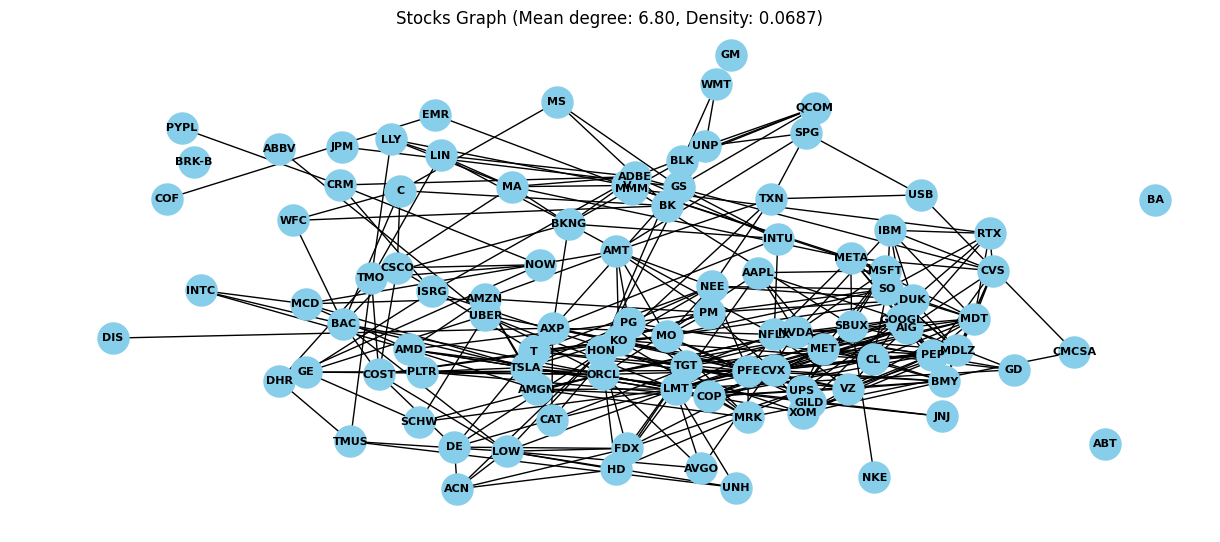

In [14]:
corr_threshold, sector_bonus = .7, .05

share_sector = pd.get_dummies(stocks[["Sector"]]).transpose().corr().to_numpy().astype(int) - np.eye(len(stocks), dtype=int)

adj = abs(fundamentals_corr_np) + share_sector * sector_bonus # GCNConv only accepts positive weights
adj = adj * (abs(adj) > corr_threshold)  
adj = adj / adj.max()

graph = nx.from_numpy_array(adj)
graph = nx.relabel_nodes(graph, dict(enumerate(stocks.index)))

plt.figure(figsize=(12, 5))
nx.draw(graph, with_labels=True, node_size=500, node_color='skyblue', font_size=8, font_weight='bold', font_color='black', pos=nx.spring_layout(graph, k=.5))
plt.title(f'Stocks Graph (Mean degree: {np.mean([degree for node, degree in graph.degree]):.2f}, Density: {nx.density(graph):.4f})')
plt.show()

In [15]:
np.save('../data/adj.npy', adj)